#  Diving Into-K Means Clustering
 

This project will be broken down into four parts. The main goal of this project is dive into the unsupervised machine learning algorithm of K-Means clustering. This project will also be a means to review the following components:
* Creating a dictionary
* Using the newly created dictionary to make a Pandas Dataframe
* Adding columns to a dataframe
* Creating simple functions
* Scaling data
* Creating scatter plots
* Creating violin plots
* Creating boxplots


This project will involve some basic exploratory data analysis and data visualization.  

## Part I - K Means Clustering Warm-up

In [1]:
# Importing the necessary Python libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline


In [2]:
# Creating a dictionary of lists (arrays)
data = {'Name': ['Dave', 'Mike', 'Sarah', 'Cody', 'Beth', 'Sally', 'Will', 'Donald', 'Donnelly', 'Shelby', 'Vanessa', 'Dan', \
                'Seth', 'Roan', 'Kristen', 'Haley', 'Keith', 'Doug', 'Roger', 'Jody', 'Deanna', 'Tory', 'Jessica', 'Gary', \
                'Anna', 'Dustin', 'Rachel', 'Kim', 'Joanna', 'Jill'], 'Age': [23, 39, 27, 31, 22, 41, 34, 55, 43, 22, 25, 37,\
                                                                             44, 30, 29, 38, 24, 49, 39, 26, 32, 30, 28, 40, \
                                                                             50, 38, 41, 29, 31, 27], 'Clients': \
       [2, 5, 18, 7, 5, 8, 22, 5, 8, 12, 15, 1, 0, 3, 6, 8, 15, 20, 22, 8, 10, 3, 11, 19, 20, 8, 7, 17, 23, 1], 'Personality':\
       ['E', 'E', 'I', 'E', 'E', 'I', 'E', 'E', 'I', 'E', 'I', 'I', 'I', 'E', 'E', 'I', 'E', 'E', 'E', 'I', 'E', 'I', 'I',\
       'I', 'I', 'E', 'E', 'E', 'I', 'E']}

In [3]:
# Creating a dataframe from the dictionary created above
df = pd.DataFrame(data)

In [4]:
# Display the first 6 rows of the dataframe
df.head(6)
# E stands for extrovert and I stands for introvert

,Name,Age,Clients,Personality
0,Dave,23,2,E
1,Mike,39,5,E
2,Sarah,27,18,I
3,Cody,31,7,E
4,Beth,22,5,E
5,Sally,41,8,I


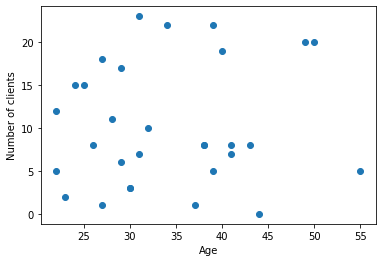

In [5]:
# Using a scatter plot to Age and Clients
plt.scatter(df.Age, df.Clients)
plt.xlabel('Age')
plt.ylabel('Number of clients');

From the above scatter plot, it is difficult to distinctly see the clusters. It looks like I see the potential from three to five clusters. I will choose the happy medium of 4 to begin with for my K value

In [6]:
km = KMeans(n_clusters=4)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
# Fit and predict. I will exclude the Name and Personality colunns since they are strings
y_predicted = km.fit_predict(df[['Age', 'Clients']])
y_predicted

array([0, 1, 2, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 0, 0, 1, 2, 3, 3, 0, 0, 0,
       0, 3, 3, 1, 1, 2, 2, 0])

From the above output, we can see 4 clusters; 0, 1, 2, and 3.

In [8]:
# Add a column called 'Cluster1' so that I can visually display the result
# The values for the Cluster1 column will be the values in the y_predicted array
df['Cluster'] = y_predicted
df.head(6)

,Name,Age,Clients,Personality,Cluster
0,Dave,23,2,E,0
1,Mike,39,5,E,1
2,Sarah,27,18,I,2
3,Cody,31,7,E,0
4,Beth,22,5,E,0
5,Sally,41,8,I,1


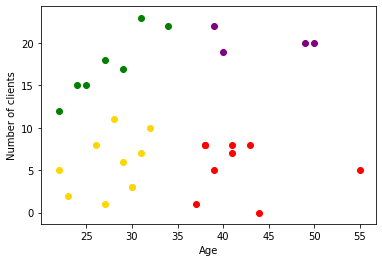

In [9]:
# Create four sub-dataframes to be able to make the scatter plot
df1 = df[df.Cluster == 0] # Only consists of rows where the the value is 0
df2 = df[df.Cluster == 1] # Only consists of rows where the value is 1
df3 = df[df.Cluster == 2]
df4 = df[df.Cluster == 3]

plt.scatter(df1.Age, df1.Clients, color = 'gold')
plt.scatter(df2.Age, df2.Clients, color = 'red')
plt.scatter(df3.Age, df3.Clients, color = 'green')
plt.scatter(df4.Age, df4.Clients, color = 'purple')

plt.xlabel('Age')
plt.ylabel('Number of clients');


There does not seem to be an issue with the above plot, but sometimes I may get an instance where there could a red mixed in with both the yellow and purple. Although this issue is not visually presented in the above figure. The steps to properly scale features if necessary will be done. 

In [10]:
#Create a copy of the dataframe for comparison on scaling versus non-scaling
df2 = df.copy() 
 


In [11]:
# Scale the Age column from 0 to 1
scaler = MinMaxScaler()
scaler.fit(df2[['Age']]) # I will try scaling Age since it does not start at zero
df2['Age'] = scaler.transform(df2[['Age']])
df2

,Name,Age,Clients,Personality,Cluster
0,Dave,0.030303,2,E,0
1,Mike,0.515152,5,E,1
2,Sarah,0.151515,18,I,2
3,Cody,0.272727,7,E,0
4,Beth,0.000000,5,E,0
5,Sally,0.575758,8,I,1
6,Will,0.363636,22,E,2
7,Donald,1.000000,5,E,1
8,Donnelly,0.636364,8,I,1
9,Shelby,0.000000,12,E,2


Now the Age column has been scaled to where values are between 0 and 1.

In [12]:
# Apply the same steps for 'Clients' column
scaler.fit(df2[['Clients']])
df2.Clients = scaler.transform(df2[['Clients']])
df2

,Name,Age,Clients,Personality,Cluster
0,Dave,0.030303,0.086957,E,0
1,Mike,0.515152,0.217391,E,1
2,Sarah,0.151515,0.782609,I,2
3,Cody,0.272727,0.304348,E,0
4,Beth,0.000000,0.217391,E,0
5,Sally,0.575758,0.347826,I,1
6,Will,0.363636,0.956522,E,2
7,Donald,1.000000,0.217391,E,1
8,Donnelly,0.636364,0.347826,I,1
9,Shelby,0.000000,0.521739,E,2


In [13]:
# Run the K Means algorithm once again with the scaled data
km2 = KMeans(n_clusters = 4)
y_predicted2 = km2.fit_predict(df2[['Age', 'Clients']])
y_predicted2

array([0, 3, 2, 0, 0, 3, 1, 3, 3, 2, 2, 3, 3, 0, 0, 3, 2, 1, 1, 0, 2, 0,
       2, 1, 1, 3, 3, 2, 1, 0])

In [14]:
df2['Cluster'] = y_predicted2
df2

,Name,Age,Clients,Personality,Cluster
0,Dave,0.030303,0.086957,E,0
1,Mike,0.515152,0.217391,E,3
2,Sarah,0.151515,0.782609,I,2
3,Cody,0.272727,0.304348,E,0
4,Beth,0.000000,0.217391,E,0
5,Sally,0.575758,0.347826,I,3
6,Will,0.363636,0.956522,E,1
7,Donald,1.000000,0.217391,E,3
8,Donnelly,0.636364,0.347826,I,3
9,Shelby,0.000000,0.521739,E,2


In [15]:
print(df.head(8))
print()
print(df2.head(8))

     Name  Age  Clients Personality  Cluster
0    Dave   23        2           E        0
1    Mike   39        5           E        1
2   Sarah   27       18           I        2
3    Cody   31        7           E        0
4    Beth   22        5           E        0
5   Sally   41        8           I        1
6    Will   34       22           E        2
7  Donald   55        5           E        1

     Name       Age   Clients Personality  Cluster
0    Dave  0.030303  0.086957           E        0
1    Mike  0.515152  0.217391           E        3
2   Sarah  0.151515  0.782609           I        2
3    Cody  0.272727  0.304348           E        0
4    Beth  0.000000  0.217391           E        0
5   Sally  0.575758  0.347826           I        3
6    Will  0.363636  0.956522           E        1
7  Donald  1.000000  0.217391           E        3


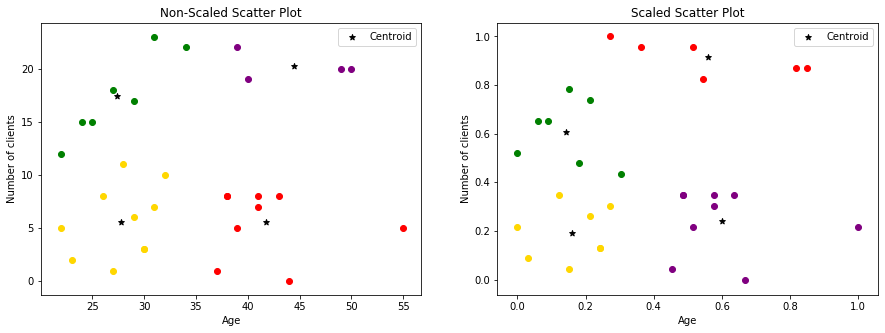

In [16]:
df_a0 = df[df.Cluster == 0] 
df_a1 = df[df.Cluster == 1]
df_a2 = df[df.Cluster == 2]
df_a3 = df[df.Cluster == 3]

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_a0.Age, df_a0.Clients, color = 'gold')
plt.scatter(df_a1.Age, df_a1.Clients, color = 'red')
plt.scatter(df_a2.Age, df_a2.Clients, color = 'green')
plt.scatter(df_a3.Age, df_a3.Clients, color = 'purple')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], color = 'black', marker = '*', label = 'Centroid')
plt.xlabel('Age')
plt.ylabel('Number of clients')
plt.title('Non-Scaled Scatter Plot')
plt.legend();

 
df_b0 = df2[df2.Cluster == 0]
df_b1 = df2[df2.Cluster == 1]
df_b2 = df2[df2.Cluster == 2]
df_b3 = df2[df2.Cluster == 3]

plt.subplot(1, 2, 2)
plt.scatter(df_b0.Age, df_b0.Clients, color = 'Gold')
plt.scatter(df_b1.Age, df_b1.Clients, color = 'red')
plt.scatter(df_b2.Age, df_b2.Clients, color = 'green')
plt.scatter(df_b3.Age, df_b3.Clients, color = 'purple')
plt.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:, 1], color = 'black', marker = '*', label = 'Centroid')

plt.xlabel('Age')
plt.ylabel('Number of clients')
plt.title('Scaled Scatter Plot')
plt.legend();

Scaling both the age and clients columns did have an effect on how the data points were clustered. There were no changes in the data points in color red. There were shifts for data points that were in the other categories. This example shows how there can be a difference in how data can be clustered depending on whether the values are scaled or not. I also notice the how the centroids have shifted locations to some degree when scaling the data.

In [17]:
km.cluster_centers_ # These are the centroid values for the non-scaled data

array([[27.8       ,  5.6       ],
       [41.77777778,  5.55555556],
       [27.42857143, 17.42857143],
       [44.5       , 20.25      ]])

In [18]:
km2.cluster_centers_ # These are the centroid values for the scaled data

array([[0.15909091, 0.19021739],
       [0.56060606, 0.91304348],
       [0.14285714, 0.60869565],
       [0.5993266 , 0.24154589]])

### Elbow Plot

Did I choose the ideal number for K? The use of the elbow plot method can be useful when working with a large amount of data with many different variables. Trying to use a scatter plot to determine or estimate the appropriate K value to use will be futile. 

In [19]:
k_range = range(1, 15)
sse = [] # sum of squared error
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Clients']])
    sse.append(km.inertia_) # Gives us the some of squared error

In [20]:
sse

[3675.7666666666664,
 2024.1176470588234,
 1223.011111111111,
 841.7916666666666,
 627.0,
 429.9722222222223,
 342.65000000000003,
 288.25,
 219.23333333333335,
 169.73333333333332,
 136.75,
 112.53333333333333,
 84.5,
 67.16666666666666]

As I can see the sum of squared error is initially really high and then drops substantially, especially toward the beginning.

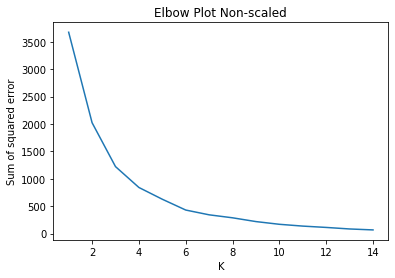

In [21]:
plt.plot(k_range, sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('Elbow Plot Non-scaled');

From the above plot, there is no distinct sharp curve that can easily give me a good K value. However, I do see a light bend on the curve at both a K value of 3, K value of 4, and K value of 6. When choosing between these three values, it looks like there is little decrease in the SSE from a K value of 6. Knowing this beforehand, a K value of 6 may have been more appropriate. Since there is correct K value per say, it is a good idea to understand our domain in which we are working in and choose an appropriate K value based on the overall objective. Note, this is for the non-scaled data.

In [22]:
# Creating an elbow plot for the scaled data
k_range = range(1, 15)
sse2 = [] # sum of squared error
for k in k_range:
    km2 = KMeans(n_clusters=k)
    km2.fit(df2[['Age', 'Clients']])
    sse2.append(km2.inertia_)

In [23]:
sse2

[4.79100780387943,
 2.5890447697459207,
 1.5667435262583342,
 0.9892731719577682,
 0.7604615985852737,
 0.5791986531159928,
 0.4528151808898786,
 0.3122305717425153,
 0.2596737264377752,
 0.2100296659671122,
 0.16154962004764373,
 0.13180235649732122,
 0.11340043037929268,
 0.09179467239271326]

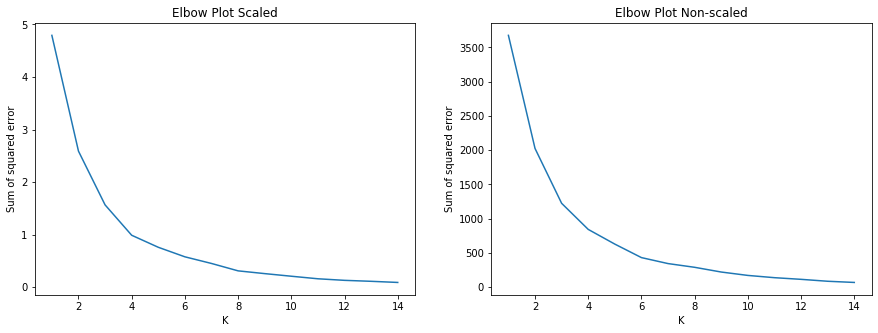

In [24]:
# Plotting the non-scaled and scaled elbow plots side by side
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, sse2)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('Elbow Plot Scaled');

plt.subplot(1, 2, 2)
plt.plot(k_range, sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('Elbow Plot Non-scaled');

When comparing the two plots, there is a slight bend at both a K value of 4 and another slight bend at a K value of 8. At the K value of 8, there is much less of a decrease in the SSE value. Whether a K value of 4 or 8 is chosen will depend on the objective when it comes to clustering groups based on certain features. 

## Part II - K-Means Clustering on Completely Randomized Data 


For the final objective I decided to make this a little more fun by making this into a larger dataset. Trying to type in over 2000 values to make this a more entertaining dataset would be all too time consuming. So with some help from using the following [link](https://www.generatedata.com/)
and using choose function in Excel, I was more quickly able to create a fictional personal trainer dataset. It is important to note that these was completely randomly generated and that in a real world scenario, variables including age, personality type, education level and a host of other variables may contribute and even predict the success of a personal trainer.

In [25]:
# Upload the csv file containing mock personal trainer data into a Pandas DataFrame
trainers = pd.read_csv("C:\\Users\\teamd\\Machine Learning Prep Course Udacity\\Mock Personal Trainer Data 1.csv")

In [26]:
# Read the first 8 rows of the trainers dataframe
trainers.head(8)

,Names,Age,Clients,Friends,Personality,Ranking,Education,Married,Years_Experience,Speech_Rate,Weight_KG,Height_CM
0,Kirby,32,27,3,Extrovert,Master Trainer,High School,Y,14,109,98,188
1,Ursa,45,19,1,Introvert,PT3,Associate,N,9,131,72,192
2,Nerea,41,24,9,Extrovert,PT2,Associate,N,12,197,64,191
3,Tara,26,15,7,Introvert,PT3,Associate,N,4,169,115,160
4,Charles,44,23,2,Extrovert,PT1,Master,Y,9,180,57,210
5,Lev,50,21,4,Introvert,PT3,High School,N,15,143,108,208
6,Benjamin,33,29,3,Extrovert,Master Trainer,Bachelor,Y,15,118,117,197
7,Petra,58,21,8,Introvert,Master Trainer,Master,Y,9,129,54,186


In [27]:
trainers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Names             500 non-null    object
 1   Age               500 non-null    int64 
 2   Clients           500 non-null    int64 
 3   Friends           500 non-null    int64 
 4   Personality       500 non-null    object
 5   Ranking           500 non-null    object
 6   Education         500 non-null    object
 7   Married           500 non-null    object
 8   Years_Experience  500 non-null    int64 
 9   Speech_Rate       500 non-null    int64 
 10  Weight_KG         500 non-null    int64 
 11  Height_CM         500 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 47.0+ KB


In [28]:
# Viewing some basics statistics of the trainers dataset
trainers.describe()

,Age,Clients,Friends,Years_Experience,Speech_Rate,Weight_KG,Height_CM
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,41.596000,14.732000,4.96200,13.062000,150.806000,84.676000,180.250000
std,11.000673,9.150718,3.18006,7.420261,28.554563,20.674765,17.188671
min,22.000000,0.000000,0.00000,0.000000,100.000000,50.000000,150.000000
25%,32.000000,6.000000,2.00000,7.000000,128.000000,67.000000,166.000000
50%,41.000000,15.000000,5.00000,13.000000,150.000000,84.000000,180.000000
75%,51.000000,23.000000,8.00000,19.000000,176.250000,102.250000,194.000000
max,60.000000,30.000000,10.00000,25.000000,200.000000,120.000000,210.000000


### Exploratory data visualization/analysis


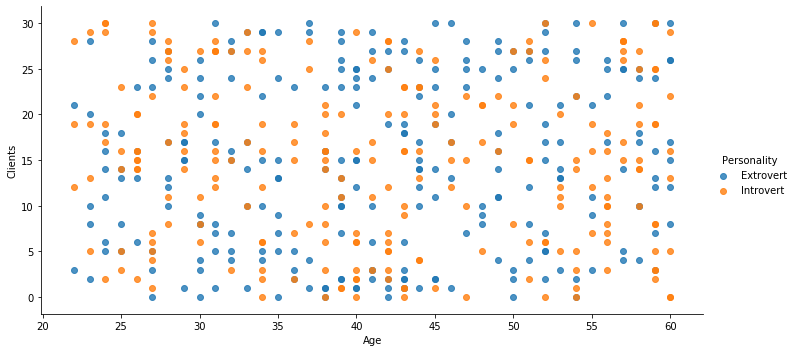

In [29]:
# Plot a scatter using Seaborn's linear plot between the Age versus Clients columns based on the Personality column
sns.lmplot(x = 'Age', y = 'Clients', data = trainers, hue = 'Personality', fit_reg = False, height =5, aspect = 2);

Talk about randomness! This may be quite challenging for the K Means algorithm to be able to group this data based on certain features. Let us see how it turns out.

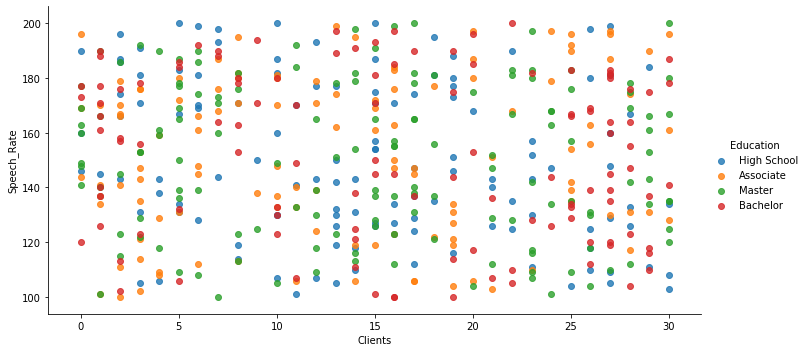

In [30]:
# Plotting a scatter plot on clients versus the rate of speech based on education
sns.lmplot(x = 'Clients', y = 'Speech_Rate', data = trainers, hue = 'Education', fit_reg = False, height =5, aspect = 2)

Once again, no distinct patterns to observe here. 

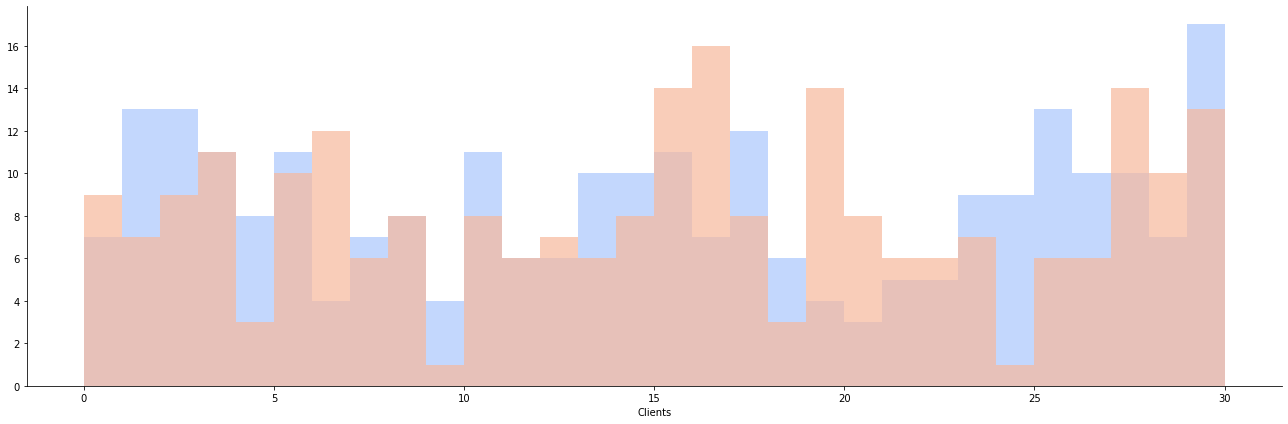

In [31]:
# Creating a stacked historgram that displays the number of clients based on personality type
g = sns.FacetGrid(trainers, hue = 'Personality', palette = 'coolwarm', height = 6, aspect = 3)
g = g.map(plt.hist, 'Clients', bins = 30, alpha = 0.7)

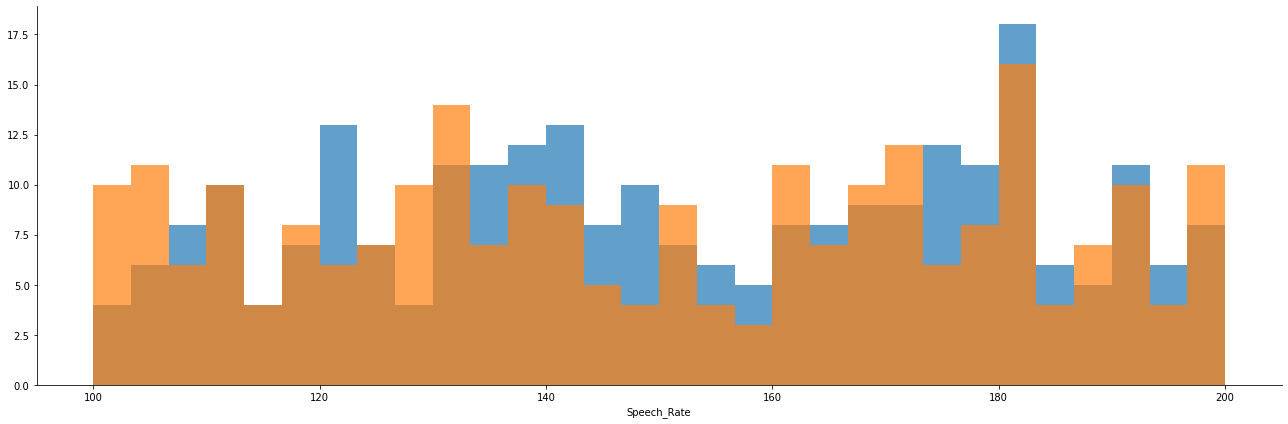

In [32]:
# Creating a stacked histogram that displayes the rate of speech based on personlaity type
# Creating a stacked historgram that displays the number of clients based on personality type
g = sns.FacetGrid(trainers, hue = 'Personality', height = 6, aspect = 3)
g = g.map(plt.hist, 'Speech_Rate', bins = 30, alpha = 0.7)

Scatter plots and histograms are not really doing a great job of visualizing this random data. I will move on to using violin and box plots to better visualize this excessively random data!

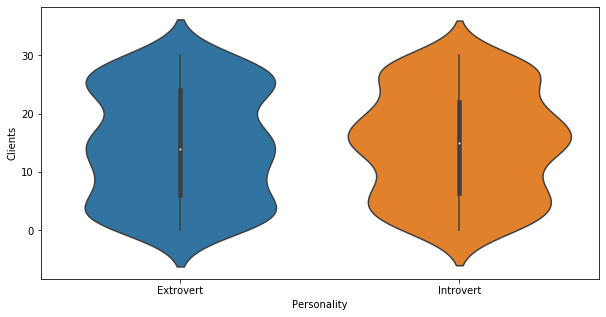

In [33]:
# Creating violin plots on the number of clients trainers have based off of personality type
plt.figure(figsize = (10, 5));
sns.violinplot(data = trainers, x = 'Personality', y = 'Clients');

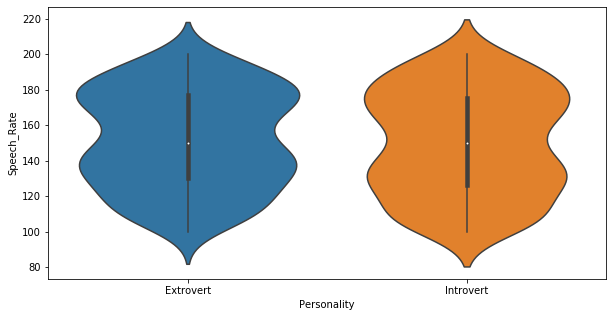

In [34]:
# Creating violin plots on the rate of speech of trainers based off of personality type
plt.figure(figsize = (10, 5))
sns.violinplot(data = trainers, x = 'Personality', y = 'Speech_Rate');

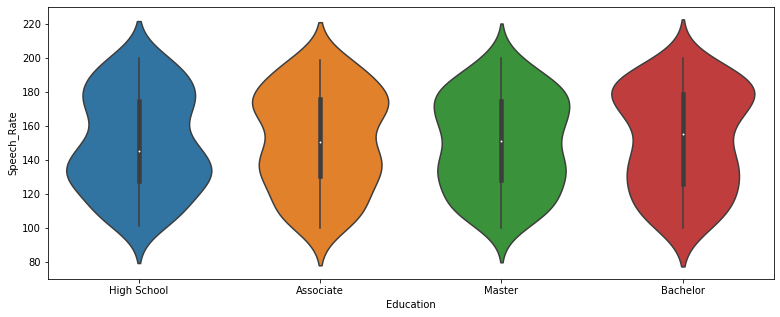

In [35]:
# Creating violin plots on the rate of speech based off of education level
plt.figure(figsize = (13, 5))
sns.violinplot(data = trainers, x = 'Education', y = 'Speech_Rate')

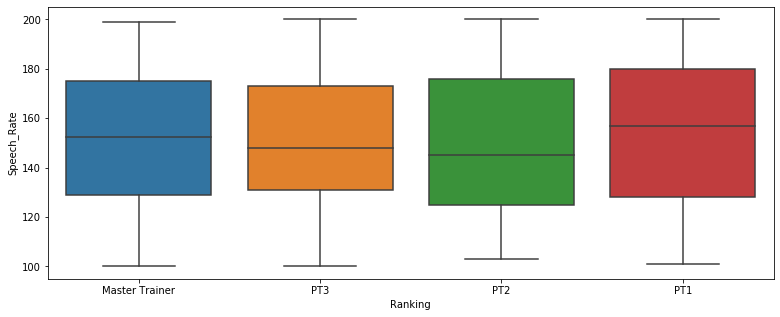

In [36]:
# Creating a boxplot on a trainers rate of speech based  off their current ranking at work
plt.figure(figsize = (13, 5))
sns.boxplot(data = trainers, x = 'Ranking', y = 'Speech_Rate');

For once, it looks like within all this sheer randomness there does seem to be some differences in the rate of speech when comparing this variable to a trainer's ranking. It does look like that PT1 and PT2 have a wider interquartile range(IQR) when compared to PT3s and Master Trainers.

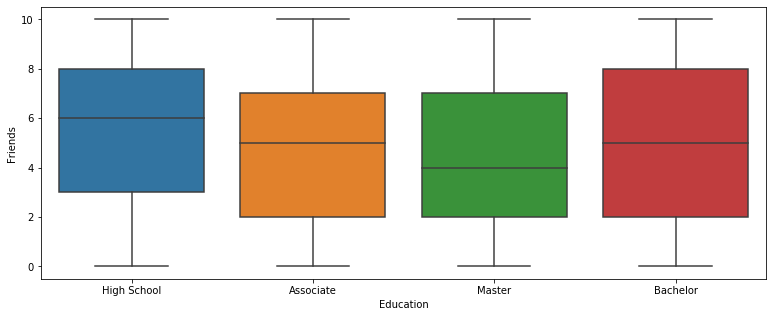

In [37]:
# Creating a boxplot on a trainers number of close friends based off of education level
plt.figure(figsize = (13, 5))
sns.boxplot(data = trainers, x = 'Education', y = 'Friends')

Though this may seem trivial pointing out findings off of a mock dataset, it does provide for good practice and then being able to apply these skills to a real dataset. From the plot above, it looks like the trainers who have an education level of a bachelor's degree have the widest IQR of number of close friends. The highest mean of close friends can be seen in the high school category, with those in the master's degree category having the lowest mean. One would expect that with completely randomly generated data that IQRs and means would be identical, but that is not the case with this dataset.

## K Means Clustering


It is now time to create some clustering labels! Since I am focusing on a trainer’s personality type, I will use a K Means model of two clusters. The decision to use two clusters is there are two different types of personalities in this dataset: extrovert and introvert.

In [38]:
# Getting one more look at the dataframe
trainers.head()

,Names,Age,Clients,Friends,Personality,Ranking,Education,Married,Years_Experience,Speech_Rate,Weight_KG,Height_CM
0,Kirby,32,27,3,Extrovert,Master Trainer,High School,Y,14,109,98,188
1,Ursa,45,19,1,Introvert,PT3,Associate,N,9,131,72,192
2,Nerea,41,24,9,Extrovert,PT2,Associate,N,12,197,64,191
3,Tara,26,15,7,Introvert,PT3,Associate,N,4,169,115,160
4,Charles,44,23,2,Extrovert,PT1,Master,Y,9,180,57,210


In [39]:
# Creating a another dataframe that only selects the 'Personality' column and all other quantitative columns
trainers2 = trainers[['Personality', 'Age', 'Clients', 'Friends', 'Years_Experience', 'Speech_Rate', 'Weight_KG', \
                     'Height_CM']]

In [40]:
# Inspecting the new dataframe
trainers2.head(10)

,Personality,Age,Clients,Friends,Years_Experience,Speech_Rate,Weight_KG,Height_CM
0,Extrovert,32,27,3,14,109,98,188
1,Introvert,45,19,1,9,131,72,192
2,Extrovert,41,24,9,12,197,64,191
3,Introvert,26,15,7,4,169,115,160
4,Extrovert,44,23,2,9,180,57,210
5,Introvert,50,21,4,15,143,108,208
6,Extrovert,33,29,3,15,118,117,197
7,Introvert,58,21,8,9,129,54,186
8,Introvert,59,25,9,15,190,87,157
9,Introvert,59,8,7,14,180,71,167


In [41]:
pt = trainers2.copy() # Creating a copy of the selected DataFrame to avoid getting a warning

In [42]:
# Creating the K Means model with 2 clusters
km3 = KMeans(n_clusters=2)

In [43]:
# Fitting the data to all columns except the 'Personality' column
km3.fit(pt.drop('Personality', axis = 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
# Determining the cluster center vectors
print(km3.cluster_centers_)
print()

# Diminensions will match the number of columns in dataframe that does not include Personality
print(km3.cluster_centers_.shape)

[[ 41.58754864  15.40856031   5.03501946  12.52918288 126.50583658
   84.21400778 180.49027237]
 [ 41.60493827  14.01646091   4.88477366  13.6255144  176.50617284
   85.16460905 179.99588477]]

(2, 7)


### Evaluating the clusters


Creating a new column called 'Cluster' which will be labeled as 1 if the trainer is extroverted and 0 if introverted.

In [45]:
def converter(personality):
    if personality == 'Extrovert':
        return 1
    else:
        return 0
# This function converts the Personality column from extrovert and introvert to 1s and 0s

In [46]:
pt['Cluster'] = pt['Personality'].apply(converter)

In [47]:
pt.head(10)

,Personality,Age,Clients,Friends,Years_Experience,Speech_Rate,Weight_KG,Height_CM,Cluster
0,Extrovert,32,27,3,14,109,98,188,1
1,Introvert,45,19,1,9,131,72,192,0
2,Extrovert,41,24,9,12,197,64,191,1
3,Introvert,26,15,7,4,169,115,160,0
4,Extrovert,44,23,2,9,180,57,210,1
5,Introvert,50,21,4,15,143,108,208,0
6,Extrovert,33,29,3,15,118,117,197,1
7,Introvert,58,21,8,9,129,54,186,0
8,Introvert,59,25,9,15,190,87,157,0
9,Introvert,59,8,7,14,180,71,167,0


How well did K Means clustering work on this completely randomized dataset? A confusion matrix and classification report will be created to determine the quality of performance.

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
print(confusion_matrix(pt['Cluster'], km3.labels_))
print()
print(classification_report(pt['Cluster'], km3.labels_))

[[127 116]
 [130 127]]

              precision    recall  f1-score   support

           0       0.49      0.52      0.51       243
           1       0.52      0.49      0.51       257

    accuracy                           0.51       500
   macro avg       0.51      0.51      0.51       500
weighted avg       0.51      0.51      0.51       500



Under normal circumstances, we would not be running a confusion matrix or classification report when using K Means clustering as the data is unlabeled. When using data that is labeled, we would be using a supervised learning algorithm.
This does not surprise me that the both the precision and recall are at 0.49 as this data was completely random and the algorithm was having to cluster the data into two different groups given the complete random features of this dataset. The algorithm appears to do a slight bit better at classifying trainers that are extroverted.



## Part III - K-Means Clustering Mock Data II

For this third part, I will create a similar dataset except the variables this time will be number of clients and rate of speech labeled as Speech. I will attempt to make the dataset more realistic in the sense that trainers who have an average rate of speech of between 140 - 160 words per minute will tend to have a higher number of clients and those outside this range will have a lesser amount of clients. I figure clients would prefer trainers who did not speak too fast or too slow. For this last part, I will stick to two features as done in Part I of this project.

In [50]:
# Loading in the csv file into a Pandas dataframe
pt = pd.read_csv(("C:\\Users\\teamd\\Machine Learning Prep Course Udacity\\Trainer_Data1.csv"))

In [51]:
# Display the first 9 rows of data from the pt dataframe
pt.head(9)

,Names,Speech_Rate,Client_Count
0,Kirby,99,3
1,Ursa,105,2
2,Nerea,134,7
3,Tara,110,12
4,Charles,155,16
5,Lev,139,11
6,Benjamin,79,7
7,Petra,178,10
8,MacKenzie,160,19


In [52]:
# Basic statistics
pt.describe()

,Speech_Rate,Client_Count
count,100.000000,100.000000
mean,148.380000,18.600000
std,24.003695,11.363596
min,77.000000,0.000000
25%,140.000000,9.750000
50%,146.000000,18.000000
75%,156.250000,26.250000
max,240.000000,47.000000


Without spending too much time on entering data into an Excel spread sheet, I managed to keep the mean rate of speech at 148.38 which is between 140 and 160 which was my aim. The standard deviation is a little higher than I'd like as I was hoping I'd be around 20 or less. I'll do some basic data exploration to get a feel of my created dataset.

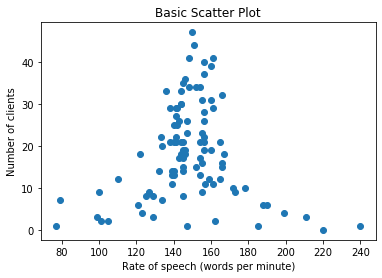

In [53]:
# Begin with a scatter plot of speech rate versus the number of clients
plt.scatter(pt.Speech_Rate, pt.Client_Count)
plt.xlabel('Rate of speech (words per minute)')
plt.ylabel('Number of clients')
plt.title('Basic Scatter Plot');

Just what I was hoping for. I wanted to make sure that there was a general trend of these mock trainers having a higher number of clients if their pace of speech fell within or near the range of 140 to 160 words per minute. However, it looks pretty hard to tell the ideal K value. I will use the elbow method to determine a K value. 

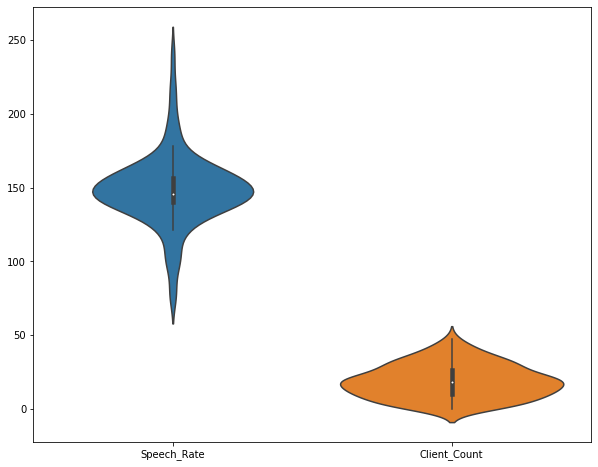

In [54]:
# Display a basic violin plot
plt.figure(figsize = (10, 8
                     ))
sns.violinplot(data = pt);

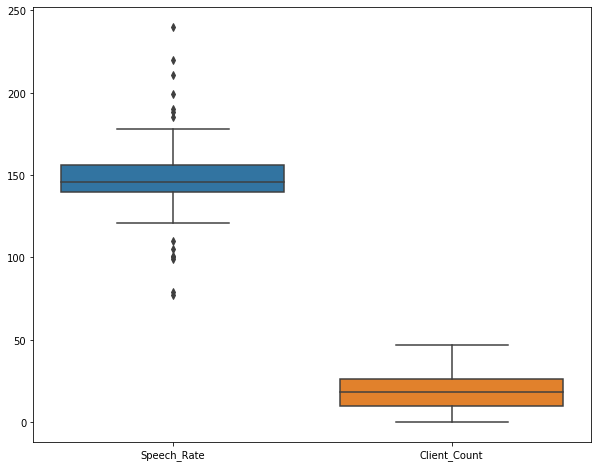

In [55]:
# A basic boxplot to hopefully help visualize some of my intentional outliers
plt.figure(figsize = (10, 8))
sns.boxplot(data = pt);

In [56]:
# Create a copy of the dataframe prior to scaling the values
pt1 = pt.copy()

In [57]:
pt1.head(10) 

,Names,Speech_Rate,Client_Count
0,Kirby,99,3
1,Ursa,105,2
2,Nerea,134,7
3,Tara,110,12
4,Charles,155,16
5,Lev,139,11
6,Benjamin,79,7
7,Petra,178,10
8,MacKenzie,160,19
9,Keith,156,22


In [58]:
# Scaling the Speech_Rate column
scaler.fit(pt1[['Speech_Rate']]) # I will try scaling Age since it does not start at zero
pt1['Speech_Rate'] = scaler.transform(pt1[['Speech_Rate']])
pt1.head(10)

,Names,Speech_Rate,Client_Count
0,Kirby,0.134969,3
1,Ursa,0.171779,2
2,Nerea,0.349693,7
3,Tara,0.202454,12
4,Charles,0.478528,16
5,Lev,0.380368,11
6,Benjamin,0.012270,7
7,Petra,0.619632,10
8,MacKenzie,0.509202,19
9,Keith,0.484663,22


In [59]:
# Scaling the Client_Count column
scaler.fit(pt1[['Client_Count']])
pt1['Client_Count'] = scaler.transform(pt1[['Client_Count']])
pt1.head(10)

,Names,Speech_Rate,Client_Count
0,Kirby,0.134969,0.063830
1,Ursa,0.171779,0.042553
2,Nerea,0.349693,0.148936
3,Tara,0.202454,0.255319
4,Charles,0.478528,0.340426
5,Lev,0.380368,0.234043
6,Benjamin,0.012270,0.148936
7,Petra,0.619632,0.212766
8,MacKenzie,0.509202,0.404255
9,Keith,0.484663,0.468085


#### Finding my K value

In [60]:
# Creating an elbow plot
k_range = range(1, 15)
sse3 = [] # sum of squared error
for k in k_range:
    km_alpha = KMeans(n_clusters=k)
    km_alpha.fit(pt1[['Speech_Rate', 'Client_Count']])
    sse3.append(km_alpha.inertia_)

In [61]:
sse3

[7.934155642914514,
 4.002489317820034,
 2.7301684756054923,
 1.5566834225165027,
 1.1907693253053995,
 0.963830435404941,
 0.7872350825876411,
 0.6601140876264966,
 0.5786901340132797,
 0.49830508349767666,
 0.43788274532838084,
 0.4198401284871113,
 0.36225831565870314,
 0.3356413707588799]

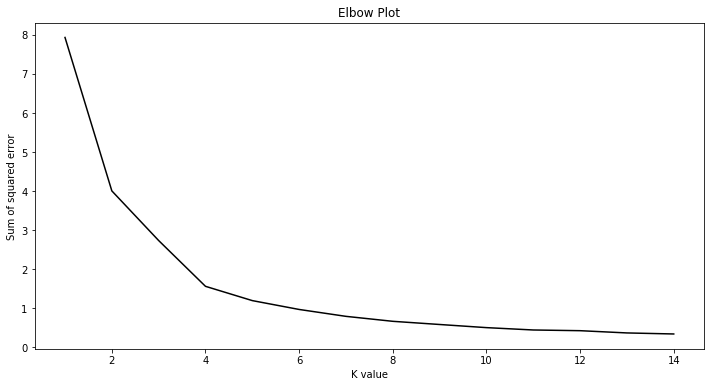

In [62]:
# Plotting the elbow plot
plt.figure(figsize = (12, 6))
plt.plot(k_range, sse3, color = 'black')
plt.xlabel('K value')
plt.ylabel('Sum of squared error')
plt.title('Elbow Plot');

Let us say that we are attempting to figure out which classification a trainer falls into. Is the trainer an All-Star employee who knows how to make sales, maintain clientele and has a speech pattern that is reflective of an attractive personality? Maybe the trainer performs above average but would not fall under the All-Star category. Some trainers may only be attempting to achieve basic quota, and other trainers are doomed to realize a career change is in order. Given the elbow plot above, it looks like there is not much of decrease in the squared sum of error after a K value of 4. The graph highlights that a K value of should suffice for this objective.

In [63]:
# Set km back to 4 clusters
km = KMeans(n_clusters = 4)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [64]:
# Fit and predict according to the rate of speech and number of clients. 
y_predicted = km.fit_predict(pt1[['Speech_Rate', 'Client_Count']])
y_predicted

array([1, 1, 1, 1, 3, 3, 1, 2, 3, 3, 3, 1, 1, 3, 3, 0, 3, 1, 3, 3, 3, 3,
       2, 1, 3, 2, 1, 3, 0, 0, 0, 0, 3, 1, 3, 3, 2, 3, 0, 0, 0, 3, 1, 3,
       3, 0, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 1, 1, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 1, 2, 3,
       2, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 2])

In [65]:
# Adding a column called 'Cluster' so that I can visualize the results
pt1['Cluster'] = y_predicted
pt1.head(15)

,Names,Speech_Rate,Client_Count,Cluster
0,Kirby,0.134969,0.063830,1
1,Ursa,0.171779,0.042553,1
2,Nerea,0.349693,0.148936,1
3,Tara,0.202454,0.255319,1
4,Charles,0.478528,0.340426,3
5,Lev,0.380368,0.234043,3
6,Benjamin,0.012270,0.148936,1
7,Petra,0.619632,0.212766,2
8,MacKenzie,0.509202,0.404255,3
9,Keith,0.484663,0.468085,3


In [66]:
# Displaying the centroid values
km.cluster_centers_

array([[0.44807187, 0.70744681],
       [0.23734663, 0.11968085],
       [0.70886782, 0.10058027],
       [0.43667348, 0.37210402]])

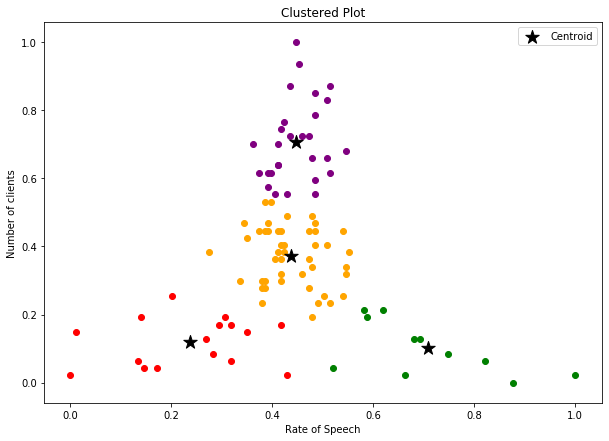

In [67]:
# Plotting the results

pt1_1a = pt1[pt1.Cluster == 0] 
pt1_2a = pt1[pt1.Cluster == 1]
pt1_3a = pt1[pt1.Cluster == 2]
pt1_4a = pt1[pt1.Cluster == 3]

plt.figure(figsize = (10, 7))
plt.scatter(pt1_1a.Speech_Rate, pt1_1a.Client_Count, color = 'purple')
plt.scatter(pt1_2a.Speech_Rate, pt1_2a.Client_Count, color = 'red')
plt.scatter(pt1_3a.Speech_Rate, pt1_3a.Client_Count, color = 'green')
plt.scatter(pt1_4a.Speech_Rate, pt1_4a.Client_Count, color = 'orange')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],s = 200, color = 'black', marker = '*', label = 'Centroid')
plt.xlabel('Rate of Speech')
plt.ylabel('Number of clients')
plt.title('Clustered Plot')
plt.legend();

## Part III Summary

A number of variables can probably be used to classify trainers and even predict a trainer's success in the health and fitness industry. In this mock dataset I decided to hypothetically assume that falling within a certain range of words per minutes is one of many variables that can contribute to a trainer's success level. Based on this [link]('https://virtualspeech.com/blog/average-speaking-rate-words-per-minute'), the average words per minute spoken can vary depending on the context of the social situation. However, I would think that not too many clients would want a trainer that speaks at a pace of someone who is auctioning off items as they may have a hard time remembering what the trainer is trying to say. At the same time, someone who speaks to slow, may signal a trainer who is not fully awake or is not running on all cylinders when it comes to motivating his clients. Machine learning is an awesome tool that could one day be used to help individuals determine if they have the attributes to being a successful trainer working in the health and fitness industry or if they should pursue other career avenues. 

## Part IV - Predicting Relationship Status!

For the final segment of this K Means clustering learning experience, I will be uploading a hypothetical (mock) dataset that could potentially simulate a real-life experiment. Although this is an over simplification of the variables that are involved in one’s relationship status, the goal is to see how well K Means clustering can predict ones relationship status given three variables; speech rate (words per minute), attraction score(1 being unattractive and 10 being highly attractive, and debt-to-income ratio. I will attempt to see how accurate this algorithm can classify each individual as being married, dating, or single.
Although this data is fictional, the point is that machine learning will prove to be valuable in the field of counseling. For those wondering what is holding them back when it comes to finally walking down the isle, machine learning may help to come up with apps that in conjunction with therapy can help pin-point areas an individual needs to improve on to increase his/her chances of tying the knot.
This will follow a similar outline as done in Part II. Once again, in normal circumstances we would not have labels for our data. Under normal circumstances, I would be using a supervised machine learning algorithm since the data is labeled. This is strictly for learning and to get more familiar with K Means Clusters and how accurate this algorithm may be.
Time to see how accurate the K Means Clustering algorithm will be in predicting relationship status!



In [68]:
# Upload the relationship status csv file into a Pandas dataframe
status =  pd.read_csv("C:\\Users\\teamd\\Machine Learning Prep Course Udacity\\status_data.csv")

In [69]:
# Display the first 8 rows of the dataframe
status.head(8)

,Status,Speech_Rate,Attraction_Score,Debt/Income_Ratio
0,Single,99,5,0.60
1,Single,105,8,0.70
2,Married,134,7,0.20
3,Dating,110,3,0.40
4,Married,155,7,0.15
5,Married,139,8,0.30
6,Single,79,1,0.80
7,Married,178,8,0.20


In [70]:
# Some statistics on my mock dataset
status.describe()

,Speech_Rate,Attraction_Score,Debt/Income_Ratio
count,100.000000,100.000000,100.000000
mean,148.380000,6.650000,0.323300
std,24.003695,2.459264,0.241486
min,77.000000,1.000000,0.010000
25%,140.000000,5.000000,0.117500
50%,146.000000,7.000000,0.270000
75%,156.250000,9.000000,0.472500
max,240.000000,10.000000,0.900000


The following code cells will consist of simple exploratory data analysis and visualizations

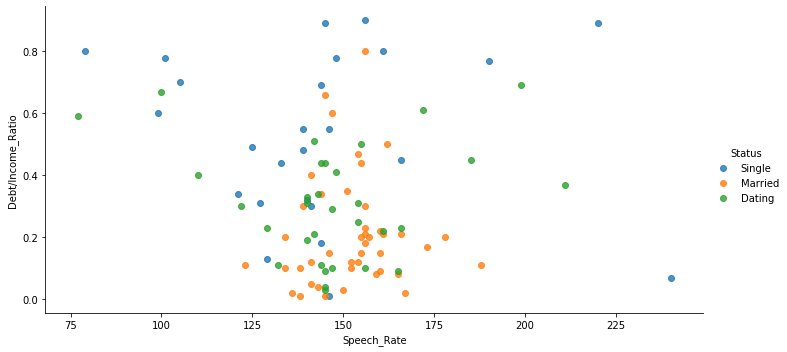

In [74]:
# Plotting a scatter plot on Speech_Rate and Debt/Income_Ratio based off of relationship status
sns.lmplot(x = 'Speech_Rate', y = 'Debt/Income_Ratio', data = status, hue = 'Status', fit_reg = False, height =5, aspect = 2);

Significant debt has been said to be a red flag when it comes to entering into relationships. More than likely in real life, people who are dating and or married are going to have a lesser debt-to-income ratio. 

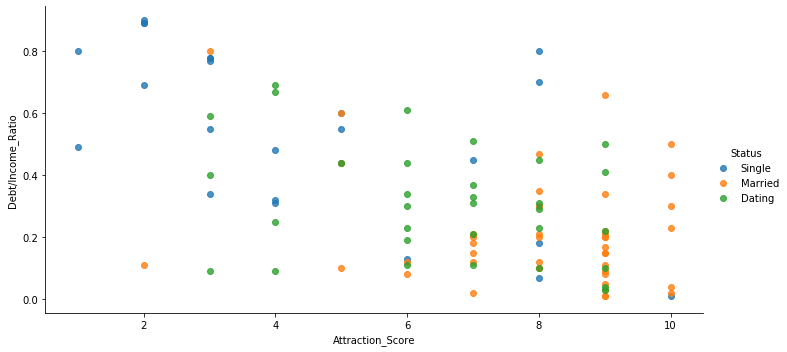

In [77]:
# Plotting a scatter plot on Attraction_Score versus Debt/Income_Ratio based off relationship status on 
sns.lmplot(x = 'Attraction_Score', y = 'Debt/Income_Ratio', data = status, hue = 'Status', \
           fit_reg = False, height =5, aspect = 2);

In [81]:
# Avoid repetive code by making a function that returns a violin plot
def violinplot_maker(dataset, cat_var, num_var):
    plt.figure(figsize = (13, 5))
    result = sns.violinplot(data = dataset, x = cat_var, y = num_var)
    return result

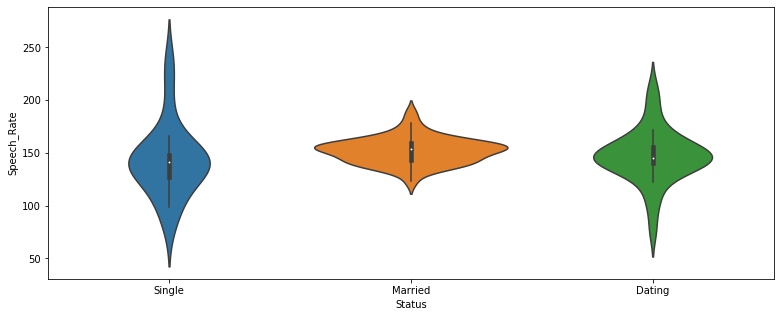

In [82]:
# Plotting a violinplot that looks at Speech_Rate for each of the relationship statuses
violinplot_maker(status, 'Status', 'Speech_Rate');

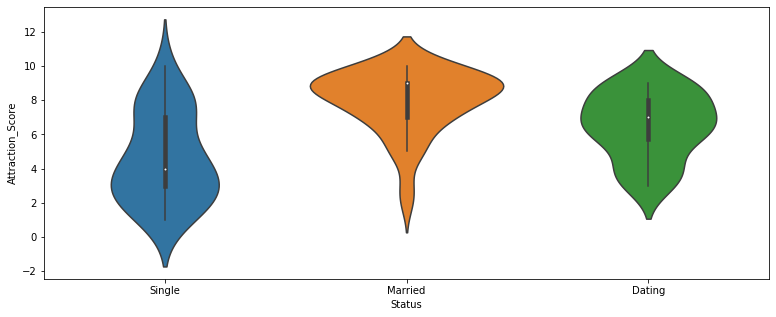

In [84]:
# A violinplot for Attraction_Score for each relationship status
violinplot_maker(status, 'Status', 'Attraction_Score');

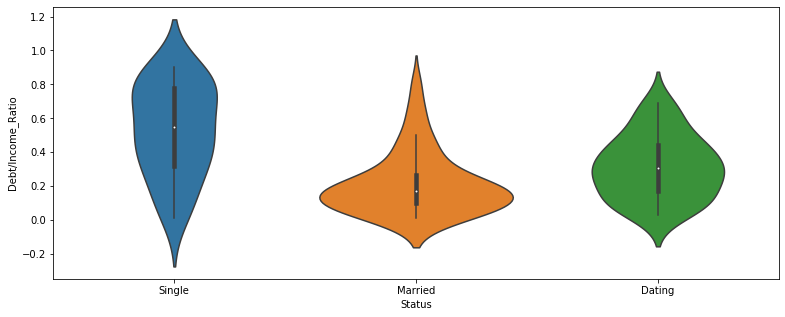

In [85]:
# A violin plot for Debt/Income_Ratio for each relationship status
violinplot_maker(status, 'Status', 'Debt/Income_Ratio');

In [86]:
# Create a function that returns a boxplot similar to the one made for violin plots
def boxplot_maker(dataset, cat_var, num_var):
    plt.figure(figsize = (13, 5))
    result = sns.boxplot(data = dataset, x = cat_var, y = num_var)
    return result


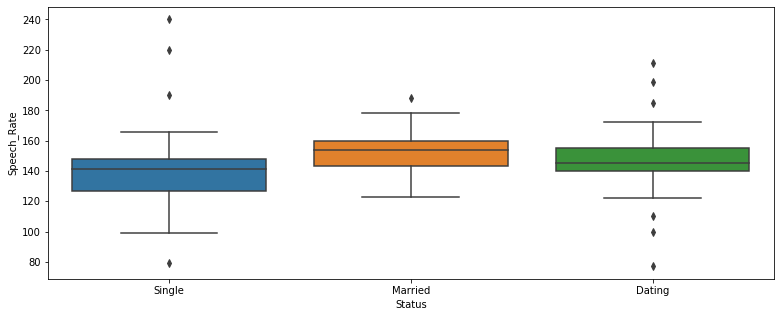

In [87]:
# Boxplot for Speech_Rate based off of relationship status
boxplot_maker(status, 'Status', 'Speech_Rate');

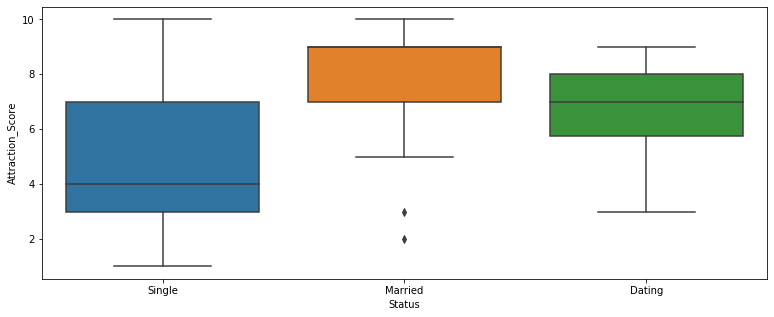

In [88]:
# Boxplot for Attraction_Score based off relationship status
boxplot_maker(status, 'Status', 'Attraction_Score');

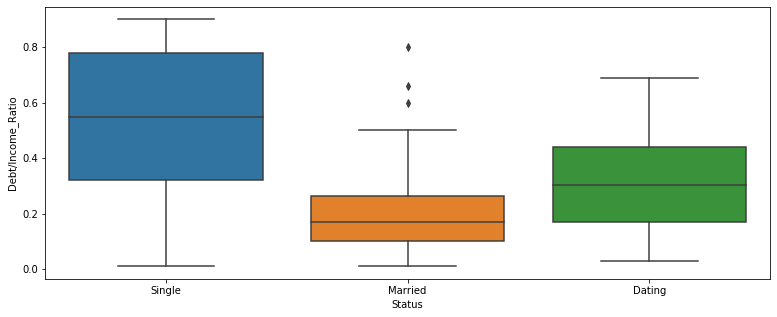

In [89]:
# Boxplot for debt-to-income ratio based off of relationship status
boxplot_maker(status, 'Status', 'Debt/Income_Ratio');

### Time for some K Means clustering!

In [90]:
# Quick view of the dataframe for reference
status.head(6)

,Status,Speech_Rate,Attraction_Score,Debt/Income_Ratio
0,Single,99,5,0.60
1,Single,105,8,0.70
2,Married,134,7,0.20
3,Dating,110,3,0.40
4,Married,155,7,0.15
5,Married,139,8,0.30


In [91]:
# Create a copy of the dataframe to reduce my chances of getting a warning message
df_status = status.copy()
df_status.head(3)

,Status,Speech_Rate,Attraction_Score,Debt/Income_Ratio
0,Single,99,5,0.6
1,Single,105,8,0.7
2,Married,134,7,0.2


In [92]:
# Creating a K Means model with three clusters since I have three different relationship statuses
km5 = KMeans(n_clusters=3)
km5

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [93]:
# Fitting the data to all columns except the 'Status' column
km5.fit(df_status.drop('Status', axis = 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [94]:
# Finding the cluster center vectors
print(km5.cluster_centers_)
print()

# Diminensions will match the number of columns in dataframe that does not include relationship status
print(km5.cluster_centers_.shape)

[[149.74358974   7.19230769   0.28628205]
 [201.375        6.125        0.44375   ]
 [110.5          3.92857143   0.46071429]]

(3, 3)


In [95]:
# Add a cluster column
# Create a function that will convert Married to the integer 2, Dating to the integer 1, and Single to the integer 0
def relationship_status_converter(status):
    if status == 'Married':
        return 2
    elif status == 'Dating':
        return 1
    else:
        return 0

In [96]:
# Applying the returned value from the function above to the 'Cluster' column
df_status['Cluster'] = df_status['Status'].apply(relationship_status_converter)

In [98]:
df_status.sample(15)

,Status,Speech_Rate,Attraction_Score,Debt/Income_Ratio,Cluster
27,Married,167,7,0.02,2
70,Single,148,3,0.78,0
85,Dating,77,3,0.59,1
87,Married,154,8,0.47,2
73,Single,139,4,0.48,0
71,Married,151,8,0.35,2
43,Dating,154,8,0.31,1
22,Married,173,9,0.17,2
9,Dating,156,8,0.10,1
61,Single,161,8,0.80,0


In [101]:
print(confusion_matrix(df_status['Cluster'], km5.labels_))
print('\n')
print(classification_report(df_status['Cluster'], km5.labels_))

[[14  3  8]
 [24  3  5]
 [40  2  1]]


              precision    recall  f1-score   support

           0       0.18      0.56      0.27        25
           1       0.38      0.09      0.15        32
           2       0.07      0.02      0.04        43

    accuracy                           0.18       100
   macro avg       0.21      0.23      0.15       100
weighted avg       0.20      0.18      0.13       100



Not so good. This data set does contain outliers and because this algorithm is about centering observations to the nearest centroid which involves calculating the mean, outliers will affect the mean value. A smaller dataset is likely to be even more affected by outliers. This could be why the precision values and f1-scores are not particularly good. An accuracy of less than 20% is poor.

In [102]:
# I will try with two clusters (married and dating will equal 1 and single will equal 0)
df_status2 = status.copy()
df_status2.head(2)

,Status,Speech_Rate,Attraction_Score,Debt/Income_Ratio
0,Single,99,5,0.6
1,Single,105,8,0.7


In [103]:
km6 = KMeans(n_clusters=2)
km6

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [104]:
km6.fit(df_status2.drop('Status', axis = 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [105]:
print(km6.cluster_centers_)
print('\n')

[[166.86046512   7.13953488   0.31651163]
 [134.43859649   6.28070175   0.32842105]]




In [106]:
def converter_3(status):
    if status == 'Married' or status == 'Dating':
        return 1
    else:
        return 0

In [108]:
df_status2['Cluster'] = df_status2['Status'].apply(converter_3)
df_status2.sample(10)

,Status,Speech_Rate,Attraction_Score,Debt/Income_Ratio,Cluster
36,Married,162,10,0.50,1
48,Dating,145,9,0.03,1
62,Married,160,9,0.22,1
32,Dating,132,6,0.11,1
44,Single,140,4,0.32,0
29,Dating,144,6,0.44,1
45,Dating,142,7,0.21,1
51,Single,190,3,0.77,0
54,Dating,145,5,0.44,1
78,Single,146,10,0.01,0


In [109]:
print(confusion_matrix(df_status2['Cluster'], km6.labels_))
print('\n')
print(classification_report(df_status2['Cluster'], km6.labels_))

[[ 6 19]
 [37 38]]


              precision    recall  f1-score   support

           0       0.14      0.24      0.18        25
           1       0.67      0.51      0.58        75

    accuracy                           0.44       100
   macro avg       0.40      0.37      0.38       100
weighted avg       0.53      0.44      0.48       100



The accuracy is at 44% when using two clusters. This is better than the 18% accuracy when using three clusters. Precision, recall, and the f-score was higher for when considering values that were 1 (married or dating). As mentioned above with regards to outliers, this more than likely could have had an effect on the accuracy of the algorithm given this dataset. This is another good example of when one may want to consider removing outliers from a dataset.

## Conclusion

This concludes this project where I dive into some K Means clustering. There is a whole lot more to learn about this unsupervised machine learning algorithm. Although my interpretations and applications of this algorithm may not have been correct, the only way to learn and improve on this skill is taking the risk and be willing to make errors. The reasoning for creating my own datasets was to avoid using some of the more traditional datasets that are often used. I figure the best way to challenge myself and learn a new skill is to try something different and not be afraid to make mistakes. 

## Resources
* https://www.youtube.com/watch?v=EItlUEPCIzM
* https://stackoverflow.com/questions/45554008/error-in-python-script-expected-2d-array-got-1d-array-instead
* https://github.com/dm185/Fifty-Year-Snowfall-History/blob/master/Mt%20Baker%20Ski%20Area%20vs%20Paradise%20Rainier%20Snowfall%20Good%20Copy%20(4).ipynb
* https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/learn/lecture/5733544#overview